In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
np.random.seed(42)
idx = np.arange(0, 100)
season = pd.Series((idx % 7) * 1.5, idx)
trend = pd.Series(idx * 0.1)
error = pd.Series(np.random.random(len(idx)) * 3, idx)
y = season + trend + error

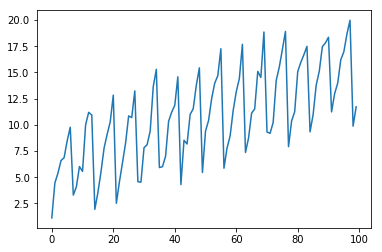

In [20]:
plt.plot(y)

In [21]:
# Implement Loess

In [22]:
def tricubic_weight(u):
    """Tricubic-Weight-Funktion"""
    result = np.power(1 - np.power(u, 3), 3)
    result[np.abs(u) > 1] = 0
    return(result)

def loess(u, x, y, q = None, d = 2):
    """
    u - point to be estimated
    x - independent variable
    y - dependent variable
    q - cutting point
    d - the order of the local polynomial
    """
    n = len(x)
    if q is None:
        q = np.log(len(x))
    
    if q < n:
        idx = np.argsort(np.abs(u-x))[:q]
        x_reg = x[idx]
        y_reg = y[idx]
        weights = tricubic_weight(np.abs(u - x_reg) / np.max(np.abs(u - x_reg)))
        coeff = np.polyfit(x = x_reg, y = y_reg, deg = d, w = weights)
        result = np.poly1d(coeff)(u)
    elif q >= n:
        weights = tricubic_weight(np.abs(u - x) / (np.max(np.abs(u - x)) * q / n))
        coeff = np.polyfit(x = x, y = y, deg = d, w = weights)
        result = np.poly1d(coeff)(u)
    return(result)

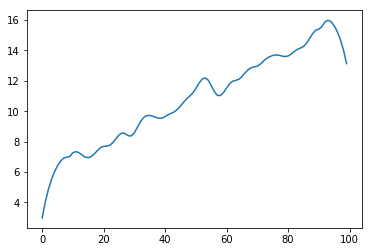

In [23]:
y_smooth = [loess(u, idx, y, 20) for u in idx]
plt.plot(idx, y_smooth)

# Implementing STL

Test of inner loop

In [24]:
#Define initial values
trend_stl = pd.Series(data = 0, index = idx)
season_stl = pd.Series(data = 0, index = idx)
#Define parameters
n_p = 7 #Number of Season
n_s = 5 #Number of Values in Loess
n_i = 1 # Number of Inner Loops
n_o = 10 # Number of Outer Loops

In [25]:
detrended_stl = y - trend_stl

In [49]:
series = pd.Series()
for cycle in range(n_p):
    idx_sub = np.arange(start = cycle, stop = len(idx), step = n_p)
    points = np.arange(start = cycle - n_p, stop = len(idx) + n_p, step = n_p)
    cycle_subseries = detrended_stl[idx_sub]
    values = [loess(u, np.array(cycle_subseries.index), np.array(cycle_subseries.values), q = n_s, d = 1) for u in points]
    series = series.append(pd.Series(data = values, index = points)).sort_index()

In [ ]:
# Implement Filter